## Sentiment Analysis

In this week's practical we will be working  with a dataset that contains tweets about six different US airlines. The task is to predict whether a tweet contains a positive, a negative or a neutral sentiment about the airline. (Source: Modified version of an implementation by Usman Malik).

In [2]:
import numpy as np 
import pandas as pd 
import re
import nltk 
import matplotlib.pyplot as plt
%matplotlib inline

### Load the Dataset

In [3]:
df = pd.read_csv('data/airline-tweets.csv')

In [4]:
display(df.head())

len(df)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


14640

### Data Analysis

In [5]:
plot_size = plt.rcParams["figure.figsize"] 
print(plot_size[0]) 
print(plot_size[1])

plot_size[0] = 8
plot_size[1] = 6
plt.rcParams["figure.figsize"] = plot_size 

6.0
4.0


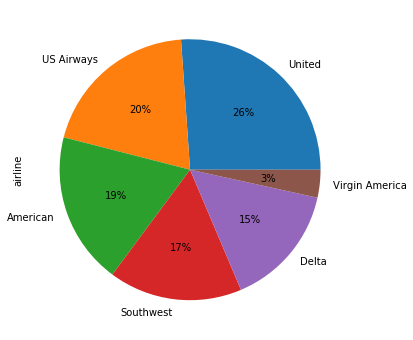

In [6]:
# Plots the percentage of tweets for each airline as a pie chart.

df.airline.value_counts().plot(kind='pie', autopct='%1.0f%%')

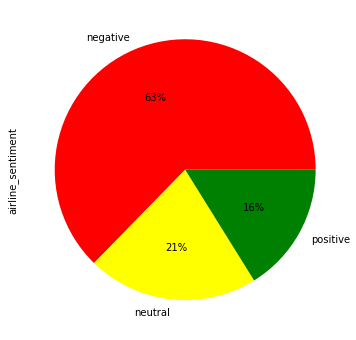

In [7]:
# Plots the distribution of sentiments across all the tweets as a pie chart.

df.airline_sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red", "yellow", "green"])

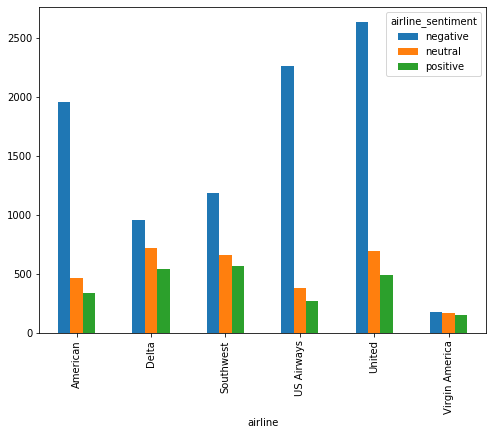

In [8]:
# Plots the distribution of sentiments for each individual airline as a bar chart.

airline_sentiment = df.groupby(['airline', 'airline_sentiment']).airline_sentiment.count().unstack()
airline_sentiment.plot(kind='bar')

### Data Cleaning

Our feature set will consist of tweets only; the 11th column of the dataset contains the tweet text. Our label set will consist of the sentiment of the tweet that we have to predict. The sentiment of the tweet is in the second column (index 1). 

Use the iloc method of the pandas data frame to create a feature set and a lable set.

In [9]:
features = df.iloc[:, 10].values
labels = df.iloc[:, 1].values

The tweets need to be cleaned before they can be used for training a machine learning model. We can use regular expressions to achieve this. Please take a look at this w3school article https://www.w3schools.com/python/python_regex.asp for details on regular expressions.

Complete the code below using regular expressions following the first example ("Remove all the special characters").

In [10]:
processed_features = []

for sentence in range(0, len(features)):
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(features[sentence]))

    # remove all single characters
    processed_feature = re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)

    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)

### TF-IDF

**Task 1**: Use the TfidfVectorizer class and convert the text features into TF-IDF feature vectors. 
    For this use the following parameter settings: max_features = 2500, min_df = 7, max_df = 0.8 and use 'english' as stop words. 
        You can find a description of these parameters here: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
    
    
    
    

You might not have the nltk package installed in your environment. The following commands can help you achieve this.

**pip install -U nltk**

**nltk.download('stopwords')**: To get the list of stopwords. A referencial list can be found here: https://gist.github.com/sebleier/554280.

In [11]:
# The following commands just need to be run once. Uncomment them, run them once, and comment them again.
#pip install -U nltk
# nltk.download('stopwords')

In [12]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TFIDFVectorizer
vectorizer = TfidfVectorizer(max_features = 2500, min_df = 7, max_df = 0.8, stop_words='english')

X = vectorizer.fit_transform(processed_features).toarray()

### Training and Test Split

**Task 2**: Divide the data into a training set (80%) and a test set (20%) and set the random state parameter to 42.

In [13]:
# Split data into training and test datasets
from sklearn.model_selection import train_test_split

y = df['airline_sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((11712, 2195), (2928, 2195), (11712,), (2928,))

### Training a KNN Classifier

**Task 3**: Train a K Nearest Neighbors classifier using the default setting (n_neighbors=5).

In [14]:
# Create KNN Classifier
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=5)

knn_clf.fit(X_train, y_train)

# Test KNN classifier on test data
y_pred = knn_clf.predict(X_test)

**Task 4**: Evaluate the model: (a) with the help of confusion matrix, (b) display the classification report, and (c) show the accuracy score for the classifier.

KNN Classifier Accuracy: 0.7158469945355191
              precision    recall  f1-score   support

    negative       0.81      0.82      0.82      1889
     neutral       0.44      0.52      0.48       580
    positive       0.71      0.54      0.61       459

    accuracy                           0.72      2928
   macro avg       0.66      0.62      0.64      2928
weighted avg       0.72      0.72      0.72      2928



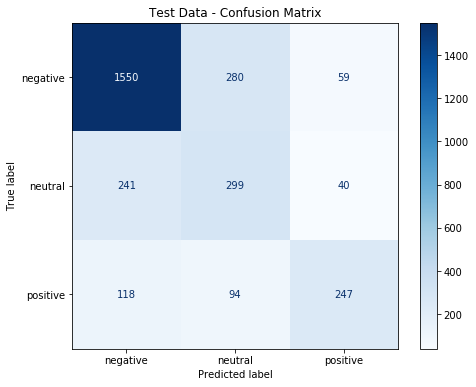

In [15]:
# Evaluate KNN Model
from sklearn.metrics import accuracy_score, plot_confusion_matrix, classification_report

print("KNN Classifier Accuracy:", accuracy_score(y_test, y_pred))

plot_confusion_matrix(knn_clf, X_test, y_test, values_format='d', cmap=plt.cm.Blues)
plt.title('Test Data - Confusion Matrix')

print(classification_report(y_test, y_pred))

### Dimensionality Reduction on Data

The resultant data is of high dimensions which cause more computation cost. PCA can help reduce the redundant features. To preserve the similarity informaiton in the original data, the target dimensionality is usually set as the squared root of the original one. Calculate the resultant dimensionality

In [16]:
reduced_dimensionality = int(np.round(np.sqrt(X_train.shape[1])))
print('The resultant dimensionality is: %d\n' % reduced_dimensionality)

The resultant dimensionality is: 47



**Task 5**: Perform PCA on both the training and testing data.

In [17]:
# Implement PCA on Train and test data
from sklearn.decomposition import PCA

pca = PCA(n_components=reduced_dimensionality)

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.fit_transform(X_test)

X_train_pca.shape, X_test_pca.shape 

((11712, 47), (2928, 47))

**Task 6**: Re-train the KNN classifier with the reduced data, and evaluate the trained model. Compare with the original case, with respect to both execution time and accuracy.

In [22]:
# Re-train KNN classifier on reduced data
knn_clf.fit(X_train_pca, y_train)

# Test KNN classifier on test data
y_pred = knn_clf.predict(X_test_pca)

KNN Classifier Accuracy: 0.619535519125683
              precision    recall  f1-score   support

    negative       0.69      0.84      0.76      1889
     neutral       0.29      0.21      0.25       580
    positive       0.49      0.24      0.32       459

    accuracy                           0.62      2928
   macro avg       0.49      0.43      0.44      2928
weighted avg       0.58      0.62      0.59      2928



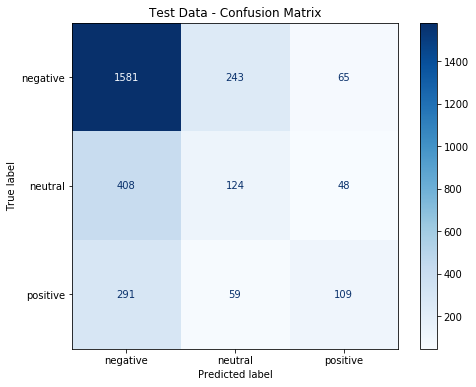

In [24]:
# Evaluate KNN Model
from sklearn.metrics import accuracy_score, plot_confusion_matrix, classification_report

print("KNN Classifier Accuracy:", accuracy_score(y_test, y_pred))

plot_confusion_matrix(knn_clf, X_test_pca, y_test, values_format='d', cmap=plt.cm.Blues)
plt.title('Test Data - Confusion Matrix')

print(classification_report(y_test, y_pred))

We can further reduce the dimensionality to 2, which can help us for visualization.

**Task 7**: Set the target dimensionality to 2, and perform PCA again on the original data.

In [25]:
# Reduce dimensionality to 2
pca = PCA(n_components=2)

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.fit_transform(X_test)

X_train_pca.shape, X_test_pca.shape 

((11712, 2), (2928, 2))

**Task 8**: Re-train and evaluate the KNN classifier for the 2 dimentional case. Compare with other previous two cases.

In [26]:
# Re-train KNN classifier on reduced data
knn_clf.fit(X_train_pca, y_train)

# Test KNN classifier on test data
y_pred = knn_clf.predict(X_test_pca)

KNN Classifier Accuracy: 0.5949453551912568
              precision    recall  f1-score   support

    negative       0.70      0.82      0.75      1889
     neutral       0.29      0.16      0.20       580
    positive       0.27      0.23      0.25       459

    accuracy                           0.59      2928
   macro avg       0.42      0.40      0.40      2928
weighted avg       0.55      0.59      0.56      2928



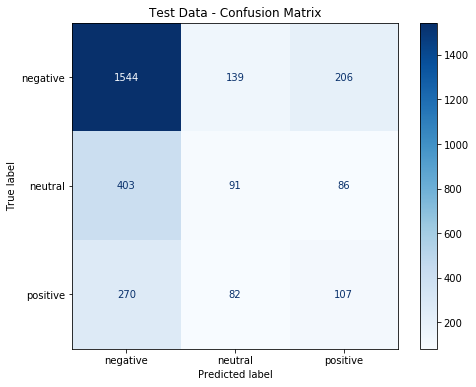

In [27]:
# Evaluate KNN Model
from sklearn.metrics import accuracy_score, plot_confusion_matrix, classification_report

print("KNN Classifier Accuracy:", accuracy_score(y_test, y_pred))

plot_confusion_matrix(knn_clf, X_test_pca, y_test, values_format='d', cmap=plt.cm.Blues)
plt.title('Test Data - Confusion Matrix')

print(classification_report(y_test, y_pred))

**Task 9**: Visualize the data with the two reduced features. Observe the plot and discuss if the boundaries are clear.

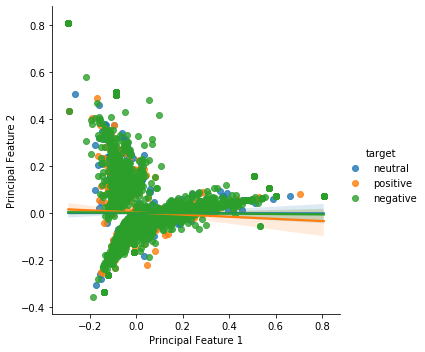

In [42]:
# Your code here
import seaborn as sns

X_train_pca_df = pd.DataFrame(X_train_pca, columns=['Principal Feature 1', 'Principal Feature 2'])

# Append target label to dataframe
X_train_pca_df['target'] = y_train

sns.lmplot('Principal Feature 1', 'Principal Feature 2', X_train_pca_df, hue = 'target')